In [1]:
import pandas as pd
import numpy as np

store_plot = True

n_valid_questions = 4
antagonist_score = np.multiply([0.2, 0.45, 0.25, 0.7, 0.25, 0.2, 0.5, 0.0, 0.25, 0.2, 0.7, 0.25, 0.5, 0.75, 0.45, 0.7, 0.25, 0.0, 0.75, 0.5, 0.5, 0.45, 0.5, -0.05, 0.5, 0.5, 0.2, 0.5, 0.25, 0.5, 0.5, 0.5, 0.0], n_valid_questions)
agreeable_score = np.multiply([0.5, 0.0, 0.45, 0.5, 0.75, 0.75, 0.75, 0.5, 0.95, 0.7, 1.0, 0.75, 0.5, 0.25, 0.5, 1.0, 1.0, 0.25, 0.65, 0.15, 0.5, 0.45, 0.75, 0.0, 0.75, 0.5, 0.5, 0.65, 0.5, 0.2, 0.7, 0.9, 0.45], n_valid_questions)


df = pd.DataFrame([antagonist_score, agreeable_score]).T
df.rename(columns={0: 'antagonist', 1: 'agreeable'}, inplace=True)


In [2]:
# restructure the data to 1 column only
agreeable_data = [{'type': 'agreeable', 'score': s} for s in agreeable_score]
antagonist_data = [{'type': 'antagonist', 'score': s} for s in antagonist_score]

new_df = pd.DataFrame(columns=['type', 'score'])

new_df = pd.concat([new_df, pd.DataFrame(agreeable_data), pd.DataFrame(antagonist_data)], ignore_index=True)

ModuleNotFoundError: No module named 'google.colab'

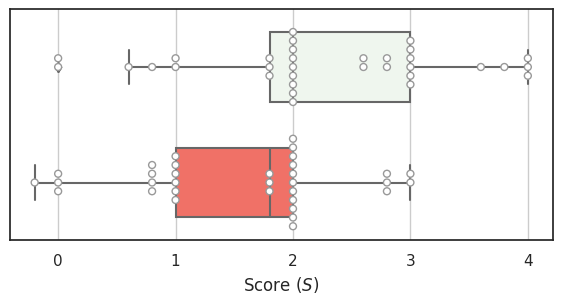

In [3]:
import seaborn as sns
import matplotlib as mtp
import matplotlib.pyplot as plt
mtp.rcParams['pdf.fonttype'] = 42

sns.set(style="white")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 3))

colors=['#EFF6EE','#F07167']
# Plot the orbital period with horizontal boxes
g = sns.boxplot(x="score", y="type", data=new_df, palette=colors, width=.6, saturation=1)

# Points as clusters
# sns.stripplot(x="score", y="type", data=new_df,
              # size=5, color="1", linewidth=1)

# Points in line
g1 = sns.swarmplot(x="score", y="type", data=new_df,
              size=5, color="1", linewidth=1, orient="h")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(xlabel="Score ($S$)")
ax.set(ylabel="")

plt.yticks([])

# Create the figure
from matplotlib.lines import Line2D

# legend_elements = [Line2D([0], [0], marker='o', color='w', label='AGR', markerfacecolor='#eff6ee', markeredgecolor='black', markersize=12),
#                   Line2D([0], [0], marker='o', color='w', label='ANT', markerfacecolor='#f07167', markeredgecolor='black', markersize=12)]
# ax.legend(handles=legend_elements, loc='lower right', labels=["AGR","ANT"])

if store_plot:
  fn = "horizontal_barplot.png"
  plt.savefig(fname=fn, transparent = True, bbox_inches = 'tight', pad_inches = 0.05)
  from google.colab import files
  files.download(fn)
else:
  plt.show()
